# COGS 108 FA23 A04/A07
## Week 9 Demo: Machine Learning
#### This demo is adapted from D8.

First, let's import packages we need:

In [1]:
import pandas as pd
import numpy as np

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

In [2]:
breweries = pd.read_csv('data/breweries.csv')
beers = pd.read_csv('data/beers.csv')

We wanna know how many null values in the dataset `beer`. **Save the number of missing values in each variable of the variables in the `beers` dataset to `null_beers`.**

We can use `.isnull()` to determine if the value is NaN.

In [3]:
null_beers = beers.isnull().sum(axis = 0)

We're going to try to predict the `style` of beer from its alcohol by volume (`abv`) and its international bitterness unites (`ibu`). To do this, **remove any beers from our `beers` dataset where data are missing for any of these three values. Store this back into hte `beers` dataset.** 

In [4]:
beers = beers.dropna(subset=['style','abv','ibu'])
beers.isnull().sum(axis = 0)

Unnamed: 0    0
abv           0
ibu           0
id            0
name          0
style         0
brewery_id    0
ounces        0
dtype: int64

Using the `beers` dataset you've not got, **merge `beers` and `breweries` together using a left join. Assign this to the variable `beer_df`. Be sure to look at the first few rows of `beer_df`.**

We can merge the datasets using `pd.merge()`.

In [5]:
# Merge the "beers" and "breweries" DataFrames using a left join and store the result in "beer_df."
beer_df = pd.merge(beers, breweries, how="left")

# Display the first few rows of the merged DataFrame "beer_df" to inspect the result.
beer_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces,city,state
0,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,NaN,NaN
1,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,NaN,NaN
2,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,NaN,NaN
3,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,NaN,NaN
4,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,NaN,NaN


Then let's see how many different styles of beer we have:

In [6]:
beer_counts = beer_df['style' ].value_counts()

print(beer_counts)

American IPA                          301
American Pale Ale (APA)               153
American Amber / Red Ale               77
American Double / Imperial IPA         75
American Blonde Ale                    61
                                     ... 
Roggenbier                              1
Smoked Beer                             1
Euro Pale Lager                         1
Other                                   1
American Double / Imperial Pilsner      1
Name: style, Length: 90, dtype: int64


For this lab, let's just try to predict the four most common `style`s of beer. **Filter the `beer_df` dataset to only include entries from the four most common `style`s of beer.** Store this filtered dataset into `beer_df`.

In [7]:
# Calculate the count of each unique value in the 'style' column of the DataFrame "beer_df" 
# and select the top four most common styles. The result is a list of these top styles.
styles = beer_df['style'].value_counts()[:4].index.tolist()

# Filter the DataFrame "beer_df" to keep only the rows where the 'style' column contains
# one of the top four styles determined in the previous step.
beer_df = beer_df[beer_df['style'].isin(styles)]

Now we are ready to build a machine learning model.

First, we will **create a variable `num_training` that includes the number of samples that corresponds to 80% of our total samples in our `beer_df` dataset. Be sure that this is an integer. Also, create a variable `num_testing` including the number corresponding to 20% of our total samples.**

In [8]:
num_training = int(len(beer_df)*0.8)

num_testing = len(beer_df)-num_training

To model these data, **split your data into `beer_X`, which includes the `abv` and `ibu` columns from `beer_df` (predictors). This should be a `pandas` DataFrame. The outcome variable will be `style`. Assign the outcome variable to the variable `beer_Y`. This should be a `numpy` array.**

In [9]:
beer_X = beer_df[['abv','ibu']]
beer_Y = np.array(beer_df['style'])

Before running our model, we'll need to **split our data into a training and test set. Use `num_training` (created above) to extract the following variables**: 
* from `beer_X`, generate : `beer_train_X`, `beer_test_X`
* from `beer_Y`, generate: `beer_train_Y`, `beer_test_Y`

In [10]:
beer_train_X = beer_X[:num_training]
beer_train_Y = beer_Y[:num_training]
beer_test_X = beer_X[num_training:]
beer_test_Y = beer_Y[num_training:]

To train our model, we'll use a linear SVM classifier.

A Support Vector Classifier (SVC), also known as a Support Vector Machine (SVM) for classification, is a supervised machine learning algorithm used for binary and multi-class classification tasks. It works by finding the optimal hyperplane that best separates different classes of data in a high-dimensional feature space.

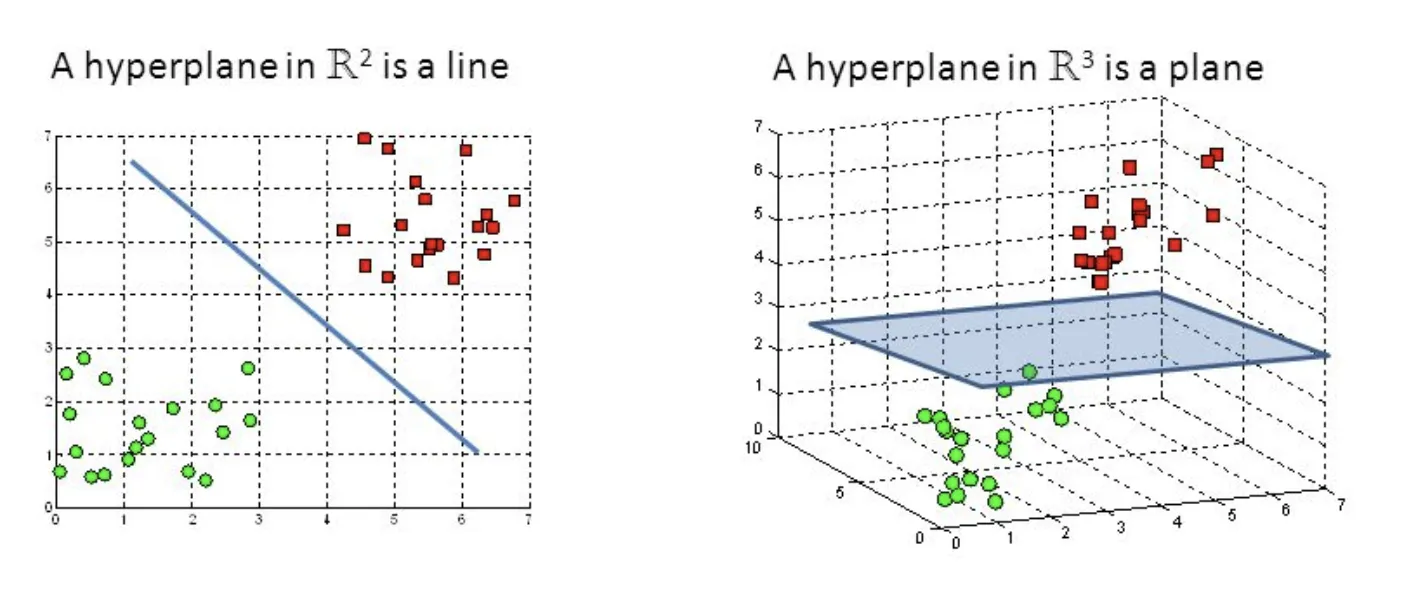

In [11]:
from IPython.display import Image
Image("SVM.png")

The equation of the hyperplane for binary classification in a linear SVM is:

$f(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)$

Where:

- $f(x)$ is the decision function for data point $x$.
- $\mathbf{w}$ is a weight vector that represents the orientation of the hyperplane.
- $\mathbf{x}$ is the feature vector of the data point.
- $b$ is a bias term that shifts the hyperplane away from the origin.
- $\cdot$ denotes the dot product between $\mathbf{w}$ and $\mathbf{x}$.

This equation defines how the SVM classifier makes decisions based on the dot product of the feature vector and the weight vector, classifying data points into one of two classes based on the sign of the result.

In [12]:
def train_SVM(X, y, kernel='linear'):
    # Create an SVM classifier with the specified kernel (default is 'linear').
    clf = SVC(kernel=kernel)
    
    # Train the classifier on the input features (X) and corresponding target labels (y).
    clf.fit(X, y)
    
    # Return the trained classifier.
    return clf

Using the `train_SVM` function defined above, **train the model. Assign this output to `beer_clf`.**

In [13]:
beer_clf = train_SVM(beer_train_X, beer_train_Y)

Now, **generate predictions from your training and test sets of predictors using the `predict` method. Assign your predictions from the training data to `beer_predicted_train_Y`. Assign your predictison from the test data to `beer_predicted_test_Y`.**

In [14]:
beer_predicted_train_Y = beer_clf.predict(beer_train_X)
beer_predicted_test_Y = beer_clf.predict(beer_test_X)

At this point, you should have built your model and generated predictions using that model for both your training and test datasets. 

Let's determine how our predictor did. **Generate a `classification_report` from sklearn for the predictions generated for your training data relative to the truth (from the original beers dataset). Save the output to `class_report_pred` and print it.**

**Below are the items contained in a classification report:**

- Precision:

Precision measures the accuracy of positive predictions made by a classification model.
It is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (incorrectly predicted positive instances).

$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
$

- Recall (Sensitivity or True Positive Rate):

Recall measures the ability of a classification model to correctly identify positive instances from the entire pool of actual positive instances.
It is calculated as the ratio of true positives to the sum of true positives and false negatives (missed positive instances).

$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
$

- F1-Score:

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both precision and recall.
It is calculated as 2 times the product of precision and recall, divided by the sum of precision and recall.

$\text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$

- Support:

Support represents the number of instances in each class in the dataset. It provides context for the other metrics by indicating how many actual instances belong to each class.

In [15]:
class_report_train = classification_report(beer_train_Y, beer_predicted_train_Y)
print(class_report_train)

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.82      0.45      0.58        69
American Double / Imperial IPA       0.76      0.25      0.37        53
                  American IPA       0.69      0.84      0.76       236
       American Pale Ale (APA)       0.57      0.64      0.60       126

                      accuracy                           0.67       484
                     macro avg       0.71      0.54      0.58       484
                  weighted avg       0.69      0.67      0.65       484



Then do the same for testing data:

In [16]:
class_report_test = classification_report(beer_test_Y, beer_predicted_test_Y)

print(class_report_test)

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.62      0.62      0.62         8
American Double / Imperial IPA       0.78      0.32      0.45        22
                  American IPA       0.70      0.72      0.71        65
       American Pale Ale (APA)       0.55      0.78      0.65        27

                      accuracy                           0.66       122
                     macro avg       0.66      0.61      0.61       122
                  weighted avg       0.68      0.66      0.64       122



Let's then print out the confusion matrix


**Note: A confusion matrix is a table that is used in classification to evaluate the performance of a machine learning model. It provides a summary of the model's predictions and how they compare to the actual true values.**

In [17]:
conf_mat_train = confusion_matrix(beer_train_Y, beer_predicted_train_Y)

print(conf_mat_train)

[[ 31   1  10  27]
 [  0  13  40   0]
 [  0   3 198  35]
 [  7   0  38  81]]


Plot the confusion matrix:

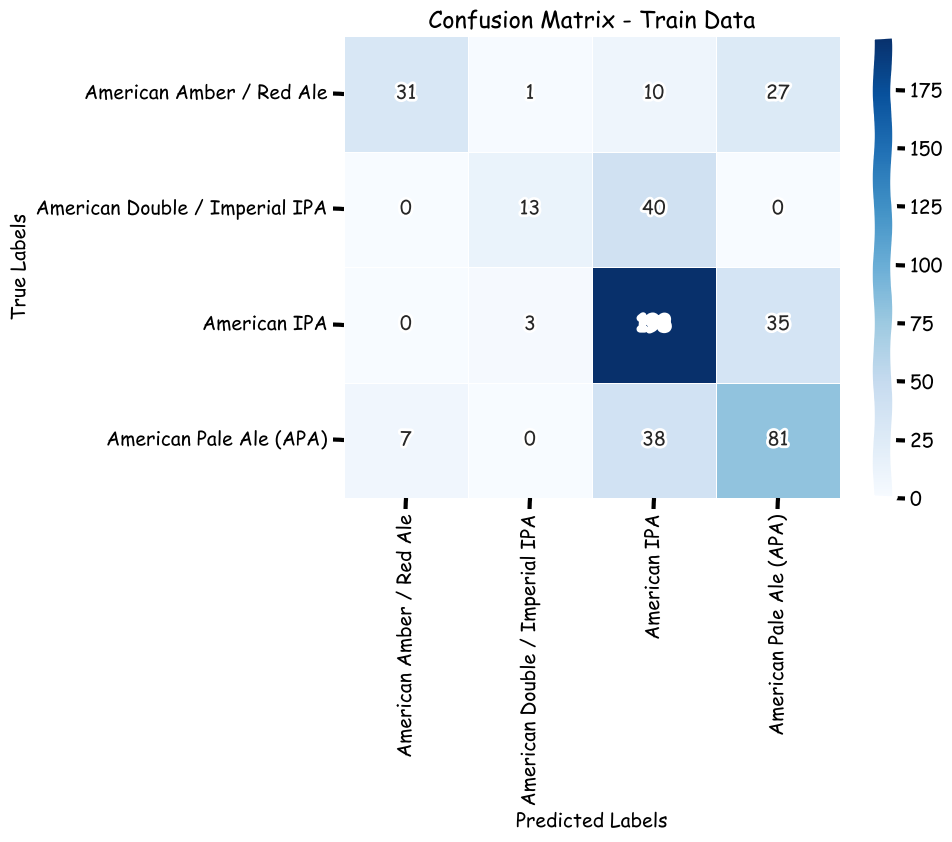

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels based on your description
class_labels = [
    "American Amber / Red Ale",
    "American Double / Imperial IPA",
    "American IPA",
    "American Pale Ale (APA)"
]

with plt.xkcd():

    # Create the confusion matrix plot with labeled axes
    plt.figure(figsize=(8, 6))  # Create a figure with a specified size
    sns.heatmap(
        conf_mat_train,            # The confusion matrix to be plotted
        annot=True,               # Annotate cells with actual values
        fmt="d",                  # Format cell values as integers
        cmap="Blues",             # Use the 'Blues' color map
        linewidths=.5,            # Add small gaps between cells for readability
        xticklabels=class_labels,  # Set x-axis labels to class names
        yticklabels=class_labels,  # Set y-axis labels to class names
    )

    plt.xlabel("Predicted Labels")  # Label for the x-axis
    plt.ylabel("True Labels")       # Label for the y-axis
    plt.title("Confusion Matrix - Train Data")  # Title for the plot
    plt.show()  # Display the plot

In [19]:
conf_mat_test = confusion_matrix(beer_test_Y, beer_predicted_test_Y)

print(conf_mat_test)

[[ 5  0  2  1]
 [ 1  7 14  0]
 [ 0  2 47 16]
 [ 2  0  4 21]]


Plot the confusion matrix:

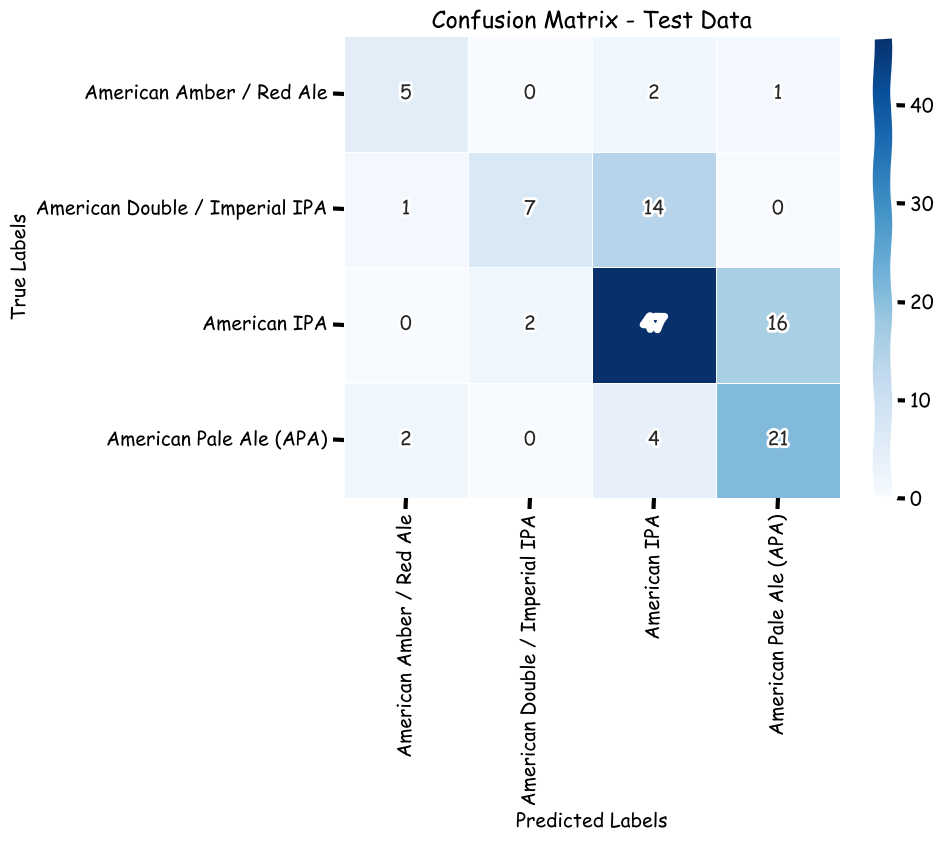

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels based on your description
class_labels = [
    "American Amber / Red Ale",
    "American Double / Imperial IPA",
    "American IPA",
    "American Pale Ale (APA)"
]

with plt.xkcd():

    # Create the confusion matrix plot with labeled axes
    plt.figure(figsize=(8, 6))  # Create a figure with a specified size
    sns.heatmap(
        conf_mat_test,            # The confusion matrix to be plotted
        annot=True,               # Annotate cells with actual values
        fmt="d",                  # Format cell values as integers
        cmap="Blues",             # Use the 'Blues' color map
        linewidths=.5,            # Add small gaps between cells for readability
        xticklabels=class_labels,  # Set x-axis labels to class names
        yticklabels=class_labels,  # Set y-axis labels to class names
    )

    plt.xlabel("Predicted Labels")  # Label for the x-axis
    plt.ylabel("True Labels")       # Label for the y-axis
    plt.title("Confusion Matrix - Test Data")  # Title for the plot
    plt.show()  # Display the plot